In [1]:
import numpy as np
import pandas as pd

from astropy.io import fits
from astropy.table import Table

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from tqdm.notebook import tqdm
from astropy.visualization import make_lupton_rgb
plt.style.use('dark_background')

In [2]:
filepath = '/Users/jimenagonzalez/research/DSPL/SpaceWarps_Inspection/Results/fits_files/'

# Candidates above threshold
hdu_list = fits.open(filepath + 'candidates_experts.fits')
images_cand = hdu_list[1].data
data_cand = pd.DataFrame(hdu_list[2].data)
hdu_list.close()
print(len(data_cand))

# Additional candidates
hdu_list = fits.open(filepath + 'additional.fits')
images_addi = hdu_list[1].data
data_addi = pd.DataFrame(hdu_list[2].data)
hdu_list.close()
print(len(data_addi))

# Random candidates below the threshold
hdu_list = fits.open(filepath + 'random.fits')
images_rand = hdu_list[1].data
data_rand = pd.DataFrame(hdu_list[2].data)
hdu_list.close()
print(len(data_rand))

images = np.concatenate((images_cand, images_addi, images_rand)).astype(np.float32)
data = pd.concat([data_cand, data_addi, data_rand], axis=0).reset_index(drop=True)
data = data.drop_duplicates() #removing duplicates
data = data.sample(frac=1, random_state=42) #random order

images = images[data.index]
data = data.reset_index(drop=True)

print(len(images), len(data))

2502
116
500
3106 3106


In [3]:
new_path = '/Users/jimenagonzalez/research/DSPL/SpaceWarps_Inspection/Results/For_experts/visapp_sw_des/'
sw_data = pd.read_csv(new_path + 'record_output.txt', sep=' ', names=['name', 'score', 'b', 'comments'])
sw_data['subject_id'] = sw_data['name'].str.extract(r'(\d+)')
sw_data['subject_id'] = pd.to_numeric(sw_data['subject_id'])

sw_data

,name,score,b,comments,subject_id
0,92407864.png,2,NaN,None,92407864
1,92411191.png,3,NaN,None,92411191
2,92415070.png,0,NaN,None,92415070
3,92406043.png,1,NaN,None,92406043
4,92404718.png,2,NaN,None,92404718
...,...,...,...,...,...
378,92413256.png,0,NaN,None,92413256
379,92400791.png,0,NaN,None,92400791
380,92399587.png,2,NaN,None,92399587
381,92414571.png,0,NaN,None,92414571


In [9]:
def make_plot_proposal(objects, title, data, Q, stretch, minimum):
    #print(title)
    plt.figure(figsize=(12,3))
    #ids = pd.read_csv('organized_ids.csv')
    for n in range(base*height):
        #data_tmp = data[data['COADD_OBJECT_ID'] == ids['ID'].iloc[n]]
        img_tmp = objects[n]#[0]
        
        plt.subplot(height, base, n+1)
        plt.subplots_adjust(wspace=0.15, hspace=0.15)#9, 90, (2, 2, 2)
        rgb = make_lupton_rgb(img_tmp[2], img_tmp[1], img_tmp[0], Q=Q, stretch=stretch, minimum=minimum)
        plt.imshow(rgb, aspect='equal')
        plt.xticks([], [])
        plt.yticks([], []) 
    #plt.savefig(title, bbox_inches='tight')
    plt.show()

152
0


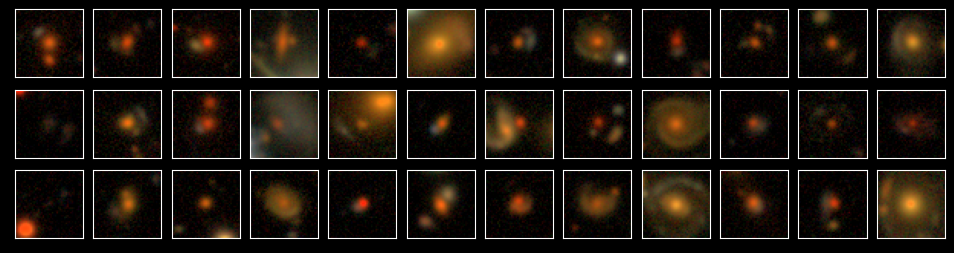

86
1


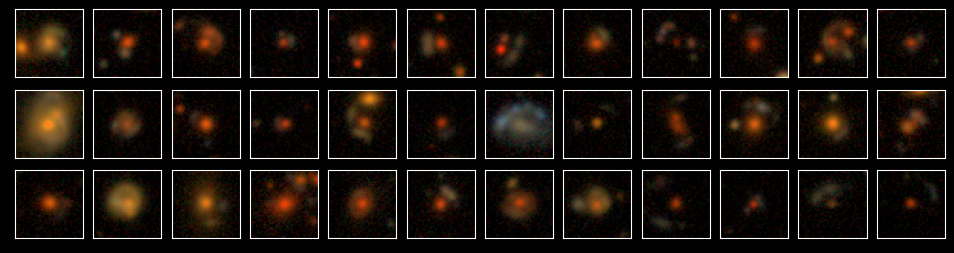

105
2


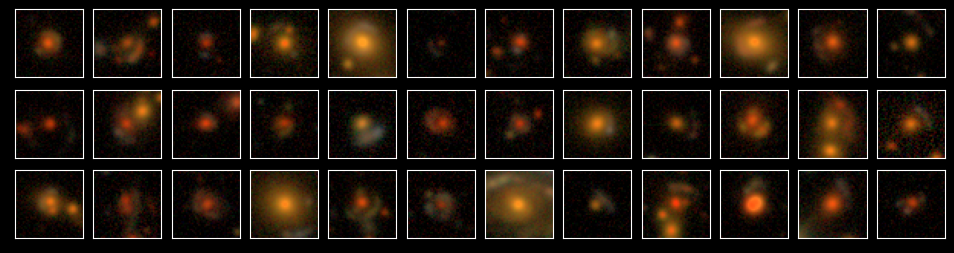

40
3


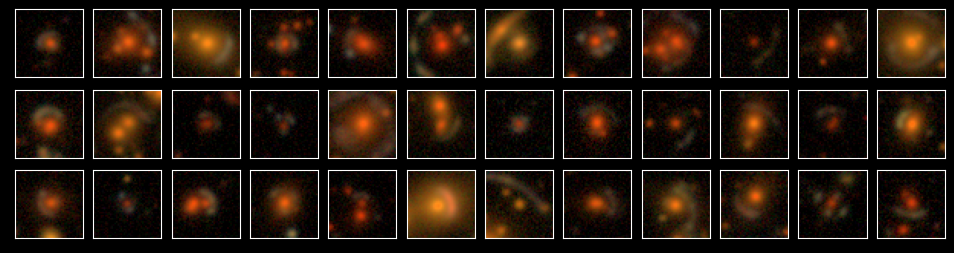

In [10]:
base, height = 12, 3
scores = [0, 1, 2, 3]

for score in scores:
    sw_tmp = sw_data[sw_data['score'] == score]
    print(len(sw_tmp))

    mask = data['SUBJECT_ID'].isin(sw_tmp['subject_id'].values)
    data_tmp = data[mask]
    images_tmp = images[data_tmp.index]

    Q, stretch, minimum = 9, 70, (0,0,0)
    print(score)
    make_plot_proposal(images_tmp, 'image.png', data_tmp, Q, stretch, minimum)